## Defs and libraries

In [43]:
import numpy as np
from qiskit import *
from math import *

In [39]:
def numberoflayers(ckt1, ckt2, i):
    new = ckt1.compose(ckt2)
    for j in range(0,i-1):
        new = new.compose(ckt2)   
    return new

def vqc(qr, cr, qubits, cbits, layers):
    #data encoding layer
    measure = QuantumCircuit(qr,cr)
    measure.h(range(qubits))
    measure.ry(pi/2,range(qubits))
    measure.rz(pi/2,range(qubits))

    # single neural layer
    layer = QuantumCircuit(qr,cr)
    for i in range(qubits-1):
       layer.cx(i,i+1)
    layer.cx(qubits-1,0)
    for i in [*range(qubits-2)]:
        layer.cx(i,i+2)
    for i in [*range(qubits-2)]:
        layer.cx(i+2,i)
    layer.u(pi/2, pi/2, pi/2, range(qubits))

    #combine layers
    new = numberoflayers(measure,layer,layers)
    new.draw('mpl')
    return new
def sigmoid(x): 
    return 1.0/(1 + np.exp(-x))
#tanh can be used as np.tanh

## Test code

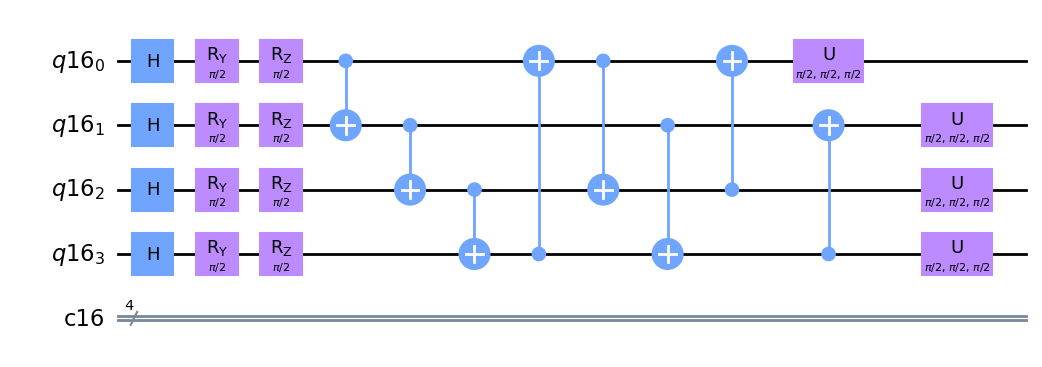

In [41]:
qlen = 4
qr = QuantumRegister(qlen)
cr = ClassicalRegister(qlen)
new = vqc(qr, cr, qlen,qlen,1)
new.draw('mpl')

## LSTM implementation

In [ ]:
#vqcs
vqc1 = vqc(qr,cr,qlen,qlen,6, x) # x has not been added yet, need to implement it later
vqc2 = vqc(qr,cr,qlen,qlen,6, x)
vqc3 = vqc(qr,cr,qlen,qlen,6, x)
vqc4 = vqc(qr,cr,qlen,qlen,6, x)
vqc5 = vqc(qr,cr,qlen,qlen,6, x)
vqc6 = vqc(qr,cr,qlen,qlen,6, x)

